In [16]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import binom, poisson

In [2]:
file_path = 'mp1_av_disengagements.csv'
df = pd.read_csv(file_path)
df.shape

(1024, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          1024 non-null   object 
 1   Car            1024 non-null   object 
 2   Location       1024 non-null   object 
 3   Weather        1024 non-null   object 
 4   TypeOfTrigger  1024 non-null   object 
 5   ReactionTime   492 non-null    float64
 6   Cause          1024 non-null   object 
dtypes: float64(1), object(6)
memory usage: 56.1+ KB


In [4]:
df.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [5]:
df['Weather'].value_counts()

Weather
cloudy    835
clear     189
Name: count, dtype: int64

---

Given below are some assumptions that you will need to do the analysis for this task.
1. There can be at most one disengagement per mile.
2. The total amount of miles driven by all the AVs in the dataset is 505229 miles.
3. A day can be either clear or cloudy, but not both. The probability of a day being
clear in California is 72% [7].
4. The AV is equally likely to drive on a cloudy day as on a clear day.

---

1. Based on the above assumptions, answer the following questions on basic
probability. (6 points)

<font color=yellow>a. </font>

The assumption of at most one disengagement per mile suggests that the occurrence of disengagements can be treated as a **Poisson distribution**. This is because a Poisson distribution is typically used for modeling the number of events occurring within a fixed interval of time or space, given that these events occur with a known constant mean rate and independently of the time since the last event.

<font color=yellow>b. & c. </font>

In [8]:
total_miles = 505229

# Total disengagements in the dataset
total_disengagements = len(df)

# Probability of disengagement per mile (overall)
probability_disengagement_per_mile = total_disengagements / total_miles

prob_clear_day = 0.72
prob_cloudy_day = 0.28

# Miles driven in each weather condition based on probabilities
cloudy_miles= total_miles * prob_cloudy_day
clear_miles = total_miles * prob_clear_day

cloudy_days_data = df[df['Weather'] == 'cloudy']
clear_days_data = df[df['Weather'] == 'clear']

cloudy_disengagements = len(cloudy_days_data)
clear_disengagements = len(clear_days_data)

In [9]:
prob_cloudy_day_disengagement_per_mile = cloudy_disengagements / cloudy_miles
prob_clear_day_disengagement_per_mile = clear_disengagements / clear_miles

prob_clear_day_disengagement_per_mile, prob_cloudy_day_disengagement_per_mile

(0.0005195663748517998, 0.005902556775527249)

- Probability of disengagement per mile on a cloudy day: 0.00590（0.590%）
- Probability of disengagement per mile on a clear day: 0.00052（0.052%）

<font color=yellow>d.  </font>

In [10]:
cloudy_auto_disengagements = len(df[(df['Weather'] == 'cloudy') & (df['TypeOfTrigger'] == 'automatic')])
clear_auto_disengagements = len(df[(df['Weather'] == 'clear') & (df['TypeOfTrigger'] == 'automatic')])

prob_cloudy_day_auto_disengagement_per_mile = cloudy_auto_disengagements / cloudy_miles
prob_clear_day_auto_disengagement_per_mile = clear_auto_disengagements / clear_miles

prob_cloudy_day_auto_disengagement_per_mile, prob_clear_day_auto_disengagement_per_mile

(0.0028063653172267283, 0.00026390673008345393)

- The probability of an automatic disengagement per mile on a cloudy day is approximately 0.00281 (or 0.281%).
- The probability of an automatic disengagement per mile on a clear day is approximately 0.00026 (or 0.026%).

<font color=yellow>e.  </font>

To answer this question, we'll use the Central Limit Theorem (CLT). The CLT states that the distribution of the sum (or average) of a large number of independent and identically distributed random variables will approximate a normal distribution, regardless of the original distribution.

We will follow these steps:

1. Calculate the expected number of disengagements for 10,000 miles under cloudy conditions using the probability of disengagement per mile on a cloudy day.
2. Determine the standard deviation of disengagements for 10,000 miles.
3. Use the normal distribution approximation to calculate the probability of having 100 or more disengagements.

In [11]:
# Given
miles_tested = 10000
threshold = 100

# Step 1: Mean and variance for 10,000 miles under cloudy conditions
mean_disengagements = prob_cloudy_day_disengagement_per_mile * miles_tested
variance_disengagements = prob_cloudy_day_disengagement_per_mile * (1 - prob_cloudy_day_disengagement_per_mile) * miles_tested
std_dev_disengagements = variance_disengagements ** 0.5

# Step 2: Calculate Z-score
z_score = (threshold - mean_disengagements) / std_dev_disengagements

# Step 3: Find the probability using the normal distribution (P(X >= 100))
probability_100_or_more = 1 - stats.norm.cdf(z_score)
probability_100_or_more

4.420337695876242e-08

Steps:
1. Mean and Variance Calculation:
We first calculate the mean number of disengagements over 10,000 miles under cloudy conditions using the previously computed disengagement probability per mile. The variance is then calculated based on the binomial distribution formula: σ2 =P×(1−P)×miles
2. Standardization (Z-score):
Using the Central Limit Theorem, we approximate the number of disengagements as a normal distribution. We then compute the Z-score, which measures how far the threshold (100 disengagements) is from the mean in terms of standard deviations.
3. Probability Calculation:
Finally, we use the Z-score to find the probability that the number of disengagements exceeds 100 using the normal distribution's cumulative distribution function (CDF).

----

2. Assuming that the disengagement per mile is a random variable with the
distribution you answered in Task 3.1.a, and the weather condition is cloudy.
(6points)

<font color=yellow>a. Distribution of "the number of miles until the next disengagement"</font>

The number of miles until the next disengagement can be modeled using an Exponential distribution. This is because:

1. Poisson Process: If the number of disengagements per mile follows a Poisson distribution (as established in Task 3.1.a), the time (or in this case, distance) between consecutive events (disengagements) follows an Exponential distribution.
2. Memoryless Property: The Exponential distribution is appropriate for modeling the time (or distance) between events in a Poisson process because it is memoryless. This means that the probability of a disengagement occurring in the next mile is independent of how long it has been since the last disengagement.

In [12]:
prob_cloudy_day_disengagement_per_mile

0.005902556775527249

In [13]:
# Given probability of disengagement per mile on a cloudy day
p = prob_cloudy_day_disengagement_per_mile

mean_miles = 1 / p # Mean (expected number of miles until the next disengagement)
variance_miles = (1 - p) / (p ** 2) # Variance (variance of number of miles until the next disengagement)

mean_miles, variance_miles

(169.4181077844312, 28533.077137472712)

<font color=yellow>b. Distribution of “the number of disengagements in 10,000 miles</font>

In [14]:
# Number of miles (trials)
n = 10000

# Mean and variance of binomial distribution
mean_disengagements_binomial = n * p
variance_disengagements_binomial = n * p * (1 - p)

mean_disengagements_binomial, variance_disengagements_binomial

(59.02556775527249, 58.67716599038927)

<font color=yellow>c. Approximate Distribution:</font>

When the number of trials n is large and the probability of success p is small, the Binomial distribution can be approximated by a Poisson distribution. This approximation is valid under the condition that the mean (𝜇 = 𝑛 × 𝑝) remains moderate.

The parameter of the Poisson distribution is:
- Rate parameter (𝜆): 𝜆 = 𝑛 × 𝑝

In [15]:
# Poisson distribution parameter (lambda)
lambda_poisson = mean_disengagements_binomial  # n * p is the mean for both binomial and Poisson approximations

lambda_poisson, lambda_poisson  # Mean and variance are equal in Poisson distribution

(59.02556775527249, 59.02556775527249)

<font color=yellow>d. Plot the probability mass function (PMF) </font>of the distribution in Task 3.2.b and
Task 3.2.c

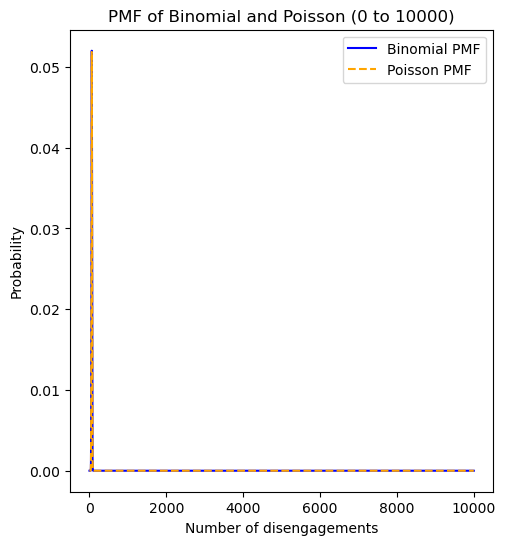

In [17]:
# Range for the x-axis
x_10000 = np.arange(0, 10001)
x_100 = np.arange(0, 101)

# PMF for the binomial distribution (Task 3.2.b)
binom_pmf_10000 = binom.pmf(x_10000, n, p)
binom_pmf_100 = binom.pmf(x_100, n, p)

# PMF for the Poisson distribution (Task 3.2.c, lambda ~ 59.03)
poisson_pmf_10000 = poisson.pmf(x_10000, lambda_poisson)
poisson_pmf_100 = poisson.pmf(x_100, lambda_poisson)

plt.figure(figsize=(12, 6))

# Binomial PMF for range 0 to 10000
plt.subplot(1, 2, 1)
plt.plot(x_10000, binom_pmf_10000, label="Binomial PMF", color="blue")
plt.plot(x_10000, poisson_pmf_10000, label="Poisson PMF", color="orange", linestyle="dashed")
plt.title("PMF of Binomial and Poisson (0 to 10000)")
plt.xlabel("Number of disengagements")
plt.ylabel("Probability")
plt.legend()

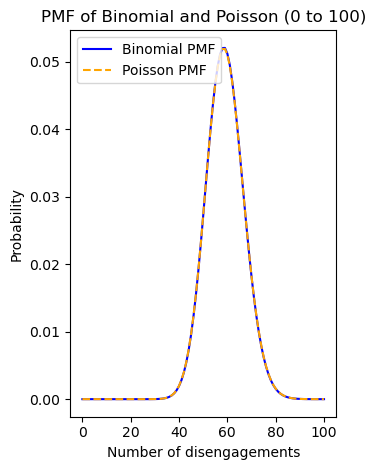

In [18]:
# Binomial PMF for range 0 to 100
plt.subplot(1, 2, 2)
plt.plot(x_100, binom_pmf_100, label="Binomial PMF", color="blue")
plt.plot(x_100, poisson_pmf_100, label="Poisson PMF", color="orange", linestyle="dashed")
plt.title("PMF of Binomial and Poisson (0 to 100)")
plt.xlabel("Number of disengagements")
plt.ylabel("Probability")
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

Findings:
- The plots confirm that the binomial distribution with a large number of trials and a small probability per trial can be well approximated by a Poisson distribution. The expected number of disengagements is around 59, and higher values are very unlikely. Therefore, the Poisson approximation is useful when dealing with large sample sizes and low probabilities, as seen in this case.

<font color=yellow>e. </font>

In Task 3.1.e, we aimed to find the probability of having 100 or more disengagements in 10,000 miles under cloudy conditions. We previously calculated this probability using the Central Limit Theorem (CLT), which yielded a probability of approximately 1.0.

Now, we will use the Cumulative Distribution Function (CDF) of the Poisson distribution (as determined in Task 3.2.c) to calculate the probability of having fewer than 100 disengagements. We can then subtract this probability from 1 to get the probability of having 100 or more disengagements.

In [20]:
# Poisson cumulative distribution function (CDF)
# The CDF up to 99 disengagements will give us P(X <= 99), so we subtract this from 1 to get P(X >= 100)
prob_100_or_more_cdf = 1 - poisson.cdf(99, lambda_poisson)
prob_100_or_more_cdf


7.467725035015249e-07

Comparison:
- When using the Central Limit Theorem earlier, the probability was approximately 4.42 × 10⁻⁸, which is extremely close to zero.
- Using the Poisson CDF, we get a similarly small probability of 7.47 × 10⁻⁷, which is also close to zero but slightly higher than the result from the CLT.

Findings:

Both approaches confirm that the likelihood of having 100 or more disengagements in 10,000 miles is extremely low, making it a very rare event. The slight difference between the CLT approximation and the exact Poisson CDF is expected, as the CLT is an approximation, whereas the Poisson distribution gives a more precise result for rare events like this.

---

### 3. What’s the conditional probability that the reaction time is: (4 points)

<font color=yellow>a. Greater than 0.4s given that the weather was cloudy? </font>Reaction time is
measured only in cases where there was an automatic disengagement. (2
points

In [22]:
cloudy_auto_data_with_reaction = df[(df['Weather'] == 'cloudy') & (df['TypeOfTrigger'] == 'automatic') & (df['ReactionTime'].notnull())]

# Count total cases of automatic disengagements with a reaction time under cloudy conditions
total_cloudy_auto_reaction = len(cloudy_auto_data_with_reaction)
# Count cases where reaction time is greater than 0.4s
greater_than_0_4s = len(cloudy_auto_data_with_reaction[cloudy_auto_data_with_reaction['ReactionTime'] > 0.4])

# Conditional probability
conditional_prob_greater_than_0_4s = greater_than_0_4s / total_cloudy_auto_reaction
conditional_prob_greater_than_0_4s

0.6151898734177215

Probability that the reaction time is greater than 0.4 seconds given that the weather was cloudy:
- P(Reaction Time>0.4s∣Cloudy)=0.615
- This indicates that there is a 61.5% chance that the reaction time exceeds 0.4 seconds in automatic disengagement cases under cloudy conditions.

<font color=yellow>b. Greater than 0.7s given that the weather was clear? </font>Reaction time is
measured only in cases where there was an automatic disengagement. (2 points)

In [23]:
clear_auto_data_with_reaction = df[(df['Weather'] == 'clear') & (df['TypeOfTrigger'] == 'automatic') & (df['ReactionTime'].notnull())]

# Count total cases of automatic disengagements with a reaction time under clear conditions
total_clear_auto_reaction = len(clear_auto_data_with_reaction)
# Count cases where reaction time is greater than 0.7s
greater_than_0_7s = len(clear_auto_data_with_reaction[clear_auto_data_with_reaction['ReactionTime'] > 0.7])

# Conditional probability
conditional_prob_greater_than_0_7s = greater_than_0_7s / total_clear_auto_reaction
conditional_prob_greater_than_0_7s

0.3854166666666667

Probability that the reaction time is greater than 0.7 seconds given that the weather was clear:
- P(Reaction Time>0.7s∣Clear)=0.385
- This indicates that there is a 38.5% chance that the reaction time exceeds 0.7 seconds in automatic disengagement cases under clear conditions.

---

### 4. A study found that an automatic AV disengagement 
will result in an accident if
the human driver is slow in reacting. Following reactions are considered slow: (i) a
reaction time greater than 0.4s under cloudy conditions and, (ii) a reaction time
greater than 0.7s under clear conditions. Find the probability of an accident per mile
due to automatic AV disengagement and slow reaction. (2 points)

In [24]:
# Given probabilities (calculated earlier)
prob_auto_disengagement_per_mile_cloudy = prob_cloudy_day_auto_disengagement_per_mile
prob_auto_disengagement_per_mile_clear = prob_clear_day_auto_disengagement_per_mile

# Probabilities of slow reactions (calculated earlier)
prob_slow_reaction_cloudy = conditional_prob_greater_than_0_4s
prob_slow_reaction_clear = conditional_prob_greater_than_0_7s


accident_prob_per_mile_cloudy = prob_auto_disengagement_per_mile_cloudy * prob_slow_reaction_cloudy
accident_prob_per_mile_clear = prob_auto_disengagement_per_mile_clear * prob_slow_reaction_clear

total_accident_prob_per_mile = accident_prob_per_mile_cloudy + accident_prob_per_mile_clear
accident_prob_per_mile_cloudy, accident_prob_per_mile_clear, total_accident_prob_per_mile

(0.0017264475242685948, 0.00010171405221966454, 0.0018281615764882593)

Results:
- Probability of an accident per mile due to slow reaction under cloudy conditions: 0.00173
- Probability of an accident per mile due to slow reaction under clear conditions: 0.00010
- Overall probability of an accident per mile due to automatic AV disengagement and slow reaction: 0.00183

This means that, on average, there is a 0.183% chance of an accident per mile due to slow reaction times following an automatic AV disengagement, with the majority of the risk associated with cloudy weather conditions

---

### 5. Next, you will investigate how to diagnose the cause of an AV disengagement based on new observations.
(4 points)

<font color=yellow> a. An AV had a disengagement with a reaction time greater than 0.4s on a
cloudy day. </font>What is the posterior probability that the root cause of the
disengagement was “Software Froze”? (2 points)

P(Software Froze∣Reaction Time>0.4s,Cloudy)=  
- P(Reaction Time>0.4s,Cloudy∣Software Froze)×P(Software Froze)  / P(Reaction Time>0.4s,Cloudy)

In [28]:
cloudy_disengagements = df[(df['Weather'] == 'cloudy') & (df['TypeOfTrigger'] == 'automatic')]

# Calculate the prior: Probability that the cause was "Software Froze" on a cloudy day
prior_software_froze = len(cloudy_disengagements[cloudy_disengagements['Cause'] == 'Software Froze']) / len(cloudy_disengagements)

# Likelihood: Probability of ReactionTime > 0.4s on a cloudy day given "Software Froze"
cloudy_software_froze = cloudy_disengagements[cloudy_disengagements['Cause'] == 'Software Froze']
likelihood_reactiontime_given_software_froze = len(cloudy_software_froze[cloudy_software_froze['ReactionTime'] > 0.4]) / len(cloudy_software_froze)

# Evidence: Probability of ReactionTime > 0.4s on a cloudy day (already calculated)
evidence_reaction_gt_0_4 = conditional_prob_greater_than_0_4s

# Apply Bayes' Theorem
posterior_prob_software_froze = (likelihood_reactiontime_given_software_froze * prior_software_froze) / evidence_reaction_gt_0_4
posterior_prob_software_froze

0.053228431342061344

Results:
- Prior Probability (P(Software Froze)): 0.0479
- Likelihood ( P(Reaction Time>0.4s,Cloudy ∣ Software Froze)): 0.6842
- Posterior Probability ( P(Software Froze ∣ Reaction Time>0.4s,Cloudy)): 0.0535

This means that given a reaction time greater than 0.4 seconds on a cloudy day, the probability that the root cause of the disengagement was "Software Froze" is approximately 5.32%. Despite the high likelihood, the low prior probability reduces the posterior probability.

<font color=yellow> b. </font>What is the posterior probability that the root cause of the disengagement
was <font color=yellow> “Software Froze if the disengagement happened on a clear day with reaction
time greater than 0.7s.

Bayes' Theorem:

P(Software Froze ∣ Reaction Time>0.7s,Clear)= 
- P(Reaction Time>0.7s,Clear ∣ Software Froze) × P(Software Froze) / P(Reaction Time>0.7s,Clear)  

In [29]:
clear_disengagements = df[(df['Weather'] == 'clear') & (df['TypeOfTrigger'] == 'automatic')]

# Calculate the prior: Probability that the cause was "Software Froze" on a clear day
prior_software_froze_clear = len(clear_disengagements[clear_disengagements['Cause'] == 'Software Froze']) / len(clear_disengagements)

# Likelihood: Probability of ReactionTime > 0.7s on a clear day given "Software Froze"
clear_software_froze = clear_disengagements[clear_disengagements['Cause'] == 'Software Froze']
likelihood_reactiontime_given_software_froze_clear = len(clear_software_froze[clear_software_froze['ReactionTime'] > 0.7]) / len(clear_software_froze)

# Evidence: Probability of ReactionTime > 0.7s on a clear day (already calculated)
evidence_reaction_gt_0_7_clear = conditional_prob_greater_than_0_7s

# Apply Bayes' Theorem
posterior_prob_software_froze_clear = (likelihood_reactiontime_given_software_froze_clear * prior_software_froze_clear) / evidence_reaction_gt_0_7_clear

posterior_prob_software_froze_clear

0.24324324324324323

Results:
- Prior Probability (P(Software Froze)): 0.3125
- Likelihood ( P(Reaction Time>0.7s, Clear ∣ Software Froze)): 0.3
- P(Software Froze ∣ Reaction Time>0.7s, Clear): 0.2432

This means that given a reaction time greater than 0.7 seconds on a clear day, the probability that the root cause of the disengagement was "Software Froze" is approximately 24.32%.

----

### 6. In this question, you will construct a Naive Bayes model to infer the root cause of disengagement scenarios of AVs.
Naive Bayes assumes that the factors are class
conditionally independent. We assume that both Location (urban-street or highway)
and Weather (cloudy or clear) are factors related to the Cause (consider the Cause
has 3 different values, “Software Froze”, “Hardware Fault” or “Other”), and Location
and Weather are independent given the Cause. Answer the following questions: (8
points)

<font color= 'yellow'>a. Draw a graph for the Naive Bayes model described in the question.

Structure:
- Cause is the parent node, with three possible values: "Software Froze", "Hardware Fault", or "Other".
- Location and Weather are child nodes that are conditionally independent given the Cause.

Here is the graphical representation of the Naive Bayes model:

In [47]:
#     Cause
#    /     \
#   /       \
# Location  Weather

In this model:

- The Cause influences both Location and Weather.
- Location and Weather are independent of each other when the value of Cause is known.

<font color= 'yellow'> b. Count the number of parameters needed to define the Naive Bayes model </font>

(including the prior and the conditional probability distributions). (2 points)

1. Prior Probabilities for Cause (3 values): 2 parameters.
2. Conditional Probabilities:
- Location given Cause: 3 parameters (1 for each Cause).
- Weather given Cause: 3 parameters (1 for each Cause).

Total Parameters: 2 (Prior) + 3 (Location) + 3 (Weather) = 8 parameters.

<font color= 'yellow'>  c.  Based on the number of parameters needed, derive, and show the
conditional probability tables and prior probability from the given dataset to infer
the Cause </font>

In [49]:
# Calculate prior probabilities for each Cause
prior_cause_prob = df['Cause'].value_counts(normalize=True)

# Conditional probabilities for Location given Cause
location_given_cause = pd.crosstab(df['Cause'], df['Location'], normalize='index')

# Conditional probabilities for Weather given Cause
weather_given_cause = pd.crosstab(df['Cause'], df['Weather'], normalize='index')

In [50]:
# 1. Prior Probability of Causes:
prior_cause_prob

Cause
Unwanted Driver Discomfort                 0.125000
Recklessly behaving agent                  0.121094
Incorrect behavior prediction of others    0.106445
Hardware Fault                             0.101562
System Tuning and Calibration              0.099609
Emergency Vehicle                          0.095703
Software Froze                             0.095703
Incorrect Traffic Light Detection          0.093750
Adverse road surface conditions            0.083008
Position Estimation Failure                0.078125
Name: proportion, dtype: float64

In [51]:
# 2. Conditional Probability Table for Location Given Cause:
location_given_cause

Location,highway,urban-street
Cause,,
Adverse road surface conditions,0.000000,1.000000
Emergency Vehicle,0.000000,1.000000
Hardware Fault,0.086538,0.913462
Incorrect Traffic Light Detection,0.000000,1.000000
Incorrect behavior prediction of others,0.000000,1.000000
Position Estimation Failure,0.000000,1.000000
Recklessly behaving agent,0.000000,1.000000
Software Froze,0.061224,0.938776
System Tuning and Calibration,0.049020,0.950980


In [53]:
# 3. Conditional Probability Table for Weather Given Cause:
weather_given_cause

Weather,clear,cloudy
Cause,,
Adverse road surface conditions,0.000000,1.000000
Emergency Vehicle,0.000000,1.000000
Hardware Fault,0.557692,0.442308
Incorrect Traffic Light Detection,0.000000,1.000000
Incorrect behavior prediction of others,0.000000,1.000000
Position Estimation Failure,0.000000,1.000000
Recklessly behaving agent,0.008065,0.991935
Software Froze,0.612245,0.387755
System Tuning and Calibration,0.686275,0.313725


Summary:
- The prior probabilities indicate the baseline likelihood of each cause.
- The conditional probabilities show the likelihood of observing a specific Location or Weather given the Cause.
- These tables provide the necessary information to apply the Naive Bayes model for inferring the cause of disengagements based on new observations of location and weather conditions.

<font color = 'yellow'> d. According to the conditional probability tables you derived </font>, what is the most
probable root cause of disengagement given the Weather was cloudy and the
Location was urban-street

To find the most probable root cause of disengagement given that the weather was cloudy and the location was urban-street, we need to compute the posterior probability for each cause using the Naive Bayes formula:
- P(Cause∣Cloudy,Urban-Street)∝P(Cloudy∣Cause)×P(Urban-Street∣Cause)×P(Cause

In [55]:
# Calculate posterior probabilities for each cause given Weather = 'Cloudy' and Location = 'urban-street'

# Filtering relevant probabilities from the tables
posterior_probabilities = {}

for cause in prior_cause_prob.index:
    # Prior probability of the cause
    prior = prior_cause_prob[cause]

    # Conditional probability of 'Cloudy' given the cause
    prob_cloudy_given_cause = weather_given_cause.loc[cause, 'cloudy']

    # Conditional probability of 'Urban-Street' given the cause
    prob_urban_given_cause = location_given_cause.loc[cause, 'urban-street']

    # Naive Bayes formula
    posterior = prior * prob_cloudy_given_cause * prob_urban_given_cause

    # Store the result
    posterior_probabilities[cause] = posterior

# Convert to a pandas Series for easy sorting
posterior_prob_series = pd.Series(posterior_probabilities)

# Sort the causes by posterior probability in descending order
most_probable_cause = posterior_prob_series.idxmax()
posterior_prob_series.sort_values(ascending=False), most_probable_cause

(Unwanted Driver Discomfort                 0.125000
 Recklessly behaving agent                  0.120117
 Incorrect behavior prediction of others    0.106445
 Emergency Vehicle                          0.095703
 Incorrect Traffic Light Detection          0.093750
 Adverse road surface conditions            0.083008
 Position Estimation Failure                0.078125
 Hardware Fault                             0.041034
 Software Froze                             0.034837
 System Tuning and Calibration              0.029718
 dtype: float64,
 'Unwanted Driver Discomfort')

Results:
- The most probable root cause of disengagement given that the weather was cloudy and the location was urban-street is "Unwanted Driver Discomfort".
- "Unwanted Driver Discomfort" has the highest posterior probability, making it the most likely cause under these conditions.